In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from itertools import groupby
import os
import seaborn as sns
%matplotlib inline

In [2]:
#dat_path = '../../../dat'DATASETS\NL 14614829 - Claim File- image 1_Part 1\Output
dat_path = "../../../dat/DATASETS/NL 14614829 - Claim File- image 1_Part 1/Output"

In [3]:
#file_name = 'Page 3.tiff'
file_name = 'Page 7.jpg'
img_orig = cv2.imread(os.path.join(dat_path, file_name), 0)
img = (255 - img_orig)/255

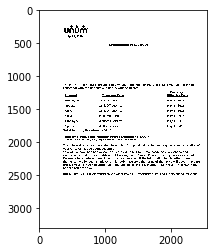

In [4]:
plt.imshow(img_orig,cmap='gray')

In [5]:
img.shape

(3300, 2550)

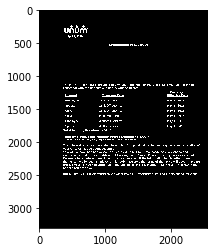

In [6]:
plt.imshow(img,cmap='gray')

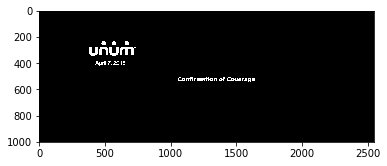

In [7]:
plt.imshow(img[:1000,:],cmap='gray')

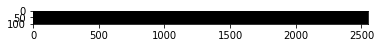

In [8]:
start = 600
end = 700
img_strip = img[start:end, :] 
plt.imshow(img_strip,cmap='gray')

In [9]:
n_rows, n_cols = img_strip.shape
n_rows, n_cols

(100, 2550)

In [10]:
bin_sz = 10
n_bins = int(np.floor(n_cols/bin_sz))
n_bins

255

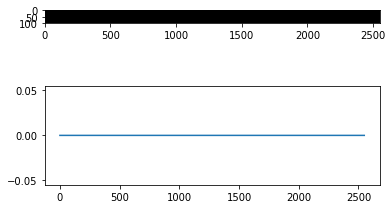

In [11]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(img_strip,cmap='gray')
ax = fig.add_subplot(212)
h_all = np.sum(img_strip, axis=0)
ax.plot(h_all)

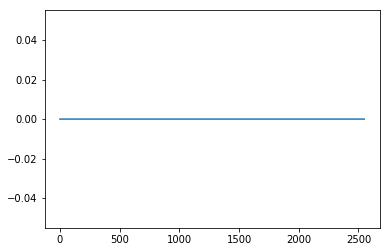

In [12]:
# Get k maxes
k = 10
idx = np.argpartition(h_all, -k)
idx = idx[-k]
h_maxes = np.zeros(len(h_all))
h_maxes[idx] = h_all[idx]
plt.plot(h_maxes)


In [13]:
#import peakutils
#indices = peakutils.indexes(h_all, thres=0.01/max(h_all), min_dist=0.1)
#indices = peakutils.indexes(h_all, thres=0.6, min_dist=0.1)
#plt.plot(h_all[indices])

In [14]:
w = 100
n_w = int(len(h_all)/w)
h_maxes = np.zeros(len(h_all))
for i in range(n_w):
    #print(i+w)
    #print(max(h_all[i*w:(i+1)*w]))
    h_maxes[i*w:(i+1)*w] = max(h_all[i*w:(i+1)*w])

In [15]:
def maxpool1D(h, w):
    #w = 100
    n_w = int(len(h)/w)
    h_maxes = np.zeros(len(h))
    for i in range(n_w):
        #print(i+w)
        #print(max(h_all[i*w:(i+1)*w]))
        h_maxes[i*w:(i+1)*w] = max(h_all[i*w:(i+1)*w]) 
    return h_maxes

In [16]:
max(h_all)

0.0

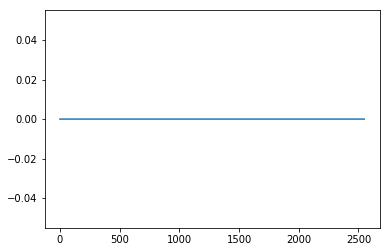

In [17]:
plt.plot(h_maxes)

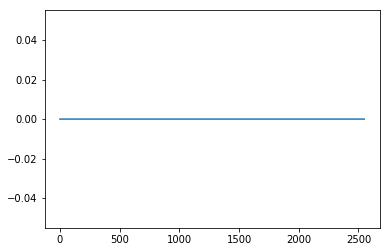

In [18]:
g = np.gradient(h_all)
plt.plot(g)

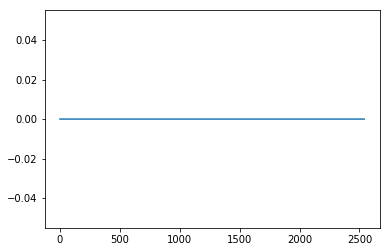

In [19]:
N = 10
f = np.convolve(h_all, np.ones((N,))/N, mode='valid')
plt.plot(f)

In [20]:
h_all.shape

(2550,)

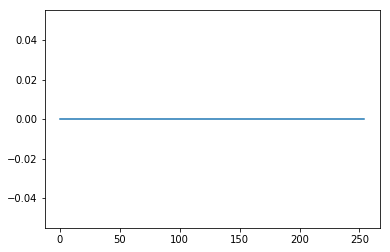

In [21]:
h = np.zeros(n_bins)
for i in range(n_bins-13):
    h[i] = np.sum(h_all[i : i + bin_sz])#np.sum(img_strip[:, i : i + n_bins])
    #h[i] = np.sum(img_strip[:, i : i + bin_sz])
plt.plot(h)    

In [22]:
if(0):
    plt.imshow(img_orig,cmap='gray')
    strip_height = 50
    H, W = img.shape
    n_strips = int(np.floor(H/strip_height))

    for i in range(n_strips):
        start = i*strip_height
        end = start + strip_height
        #print(end)
        img_strip = img[start:end, :]  
        fig = plt.figure()
        ax = fig.add_subplot(411)
        ax.imshow(img_orig[start:end, :], cmap='gray')
        ax = fig.add_subplot(412)
        h_all = np.sum(img_strip, axis=0)
        ax.plot(h_all)
        '''
        N = 10
        f = np.convolve(h_all, np.ones((N,))/N, mode='valid')
        ax.plot(f)    

        ax = fig.add_subplot(313)
        g = np.gradient(h_all)
        ax.plot(g)
        #ax = fig.add_subplot(313)
        '''
        ax = fig.add_subplot(413)
        h_maxes = maxpool1D(h_all, w=200)
        ax.plot(h_maxes)

        ax = fig.add_subplot(414)
        g = np.gradient(h_maxes)
        ax.plot(g)





In [23]:
def remove_consecutive(input): 
    '''
    # group all consecutive elements based on their  
    # order in input and we are only concerned 
    # about first element of each consecutive subgroup 
    # in given input, so key value will work for us 
    # and we will join these keys without space to  
    # generate resultant string 
    result = [] 
    for (key,group) in groupby(input): 
        print(group)
        result.append(key) 

    return np.array(result)
    '''
    result = input.copy()
    last_val = 0
    for idx, val in enumerate(input):
        if(last_val != 0):
            if val == last_val:
                result[idx] = 0
        if(val == 1 or val == -1):
            last_val = val
        
            
    return result
            
        

In [41]:
a = [0, 1, 1, 0, -1, 0, 0, 1, 0, 0 ,0, -1, 0, 0]
a = remove_consecutive(a)
a

[0, 1, 0, 0, -1, 0, 0, 1, 0, 0, 0, -1, 0, 0]

In [106]:

def remove_false_cols(grads):
    min_col_width = 50
    # Get all posititions of col starts
    
    col_starts = np.squeeze(np.argwhere(grads==1))
    # If dist between 2 1's < min_col_width--> set all to zeros until next 1 pos
    prev_pos = col_starts[0]
    for idx, pos in enumerate(col_starts):
        if idx > 0:
            dist = pos - prev_pos
            if dist < min_col_width:
                if idx + 1 < len(col_starts):
                    next_pos = col_starts[idx+1]
                    grads[pos:next_pos-1] = 0
                else:
                    # Suppress all till end
                    grads[pos:] = 0

    return grads

In [26]:
a = np.array([1,0,0,-1,0,1,0,-1])
np.squeeze(np.argwhere(a==1))

array([0, 5])

In [56]:
a = np.array([0,0,0,10,0,0,-10,0,0,5,0,0,-6,0,0])

a[a>0] = 1
a[a<0] = -1
a

array([ 0,  0,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0])

In [93]:
def clean_grads(grads):
    # TODO: outliers removal
    
    # Adaptive threshold = max*ratio
    ratio = 0.5
    thresh = np.max(grads)*ratio   
    
    # Filter pos values
    filter_pos_idx = np.squeeze(np.argwhere(np.logical_and((grads > 0), (grads <= thresh))))
    grads[filter_pos_idx] = 0
    
    # Filter neg values
    filter_neg_idx = np.squeeze(np.argwhere(np.logical_and((grads < 0), (grads >= -thresh))))
    grads[filter_neg_idx] = 0
 
    # Normalize thr grads to 1/-1
    grads[grads < 0] = -1
    grads[grads > 0] = 1

    # Remove consecutive 1's or -1's
    grads = remove_consecutive(grads)
    
    return grads

In [104]:
def row_pattern_detect(row_grads):
    
    if len(np.argwhere(row_grads==1)) >= 2:
        # Min col distance criteria
        
        # If dist between 2 1's < min_col_width--> set all to zeros
        row_grads = remove_false_cols(row_grads)
        # Count 1's => 2
        if len(np.argwhere(row_grads==1)) >= 2:
            col_starts = np.squeeze(np.argwhere(row_grads==1))
        
            return len(col_starts) >= 2, len(col_starts)
        else:
            return False, 0
    else:
        return False, 0
    

In [29]:
x = np.array([1,2,3,4,-1,-2, -3])
#x[x > 0][x < 3]=0
#np.where(x > 0 and x < 3)
#(x > 0) and (x > 0)
x[np.logical_and((x > 0), (x <= 2))]=0
x

x[np.logical_and((x < 0), (x >= -2))]=0
x

array([ 0,  0,  3,  4,  0,  0, -3])

In [30]:
x = np.array([1,2,3,4,-1,-2, -3])
ix = np.squeeze(np.argwhere(np.logical_and((x < 0), (x >= -2))))
#x[ix[0][0]]
print(ix)
#ix = np.squeeze(ix)
x[ix]=0
x


[4 5]


array([ 1,  2,  3,  4,  0,  0, -3])

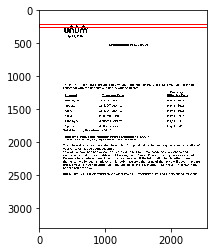

In [31]:

# Create figure and axes
fig,ax = plt.subplots(1)



strip_height = 50
start = 100
end = 200
# Create a Rectangle patch
rect = patches.Rectangle((0,end),img_orig.shape[1],strip_height,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# Display the image
ax.imshow(img_orig, cmap='gray')
#ax.imshow()
#plt.show()

/home/ahmad/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


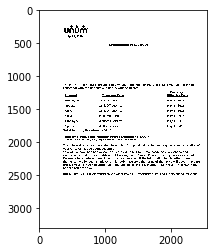

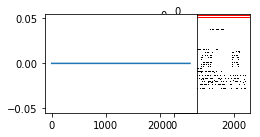

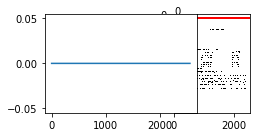

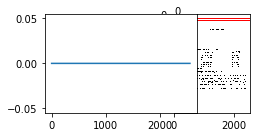

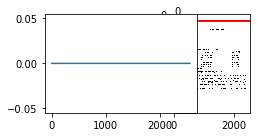

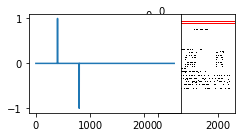

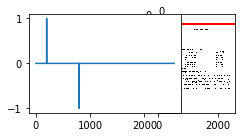

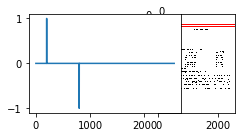

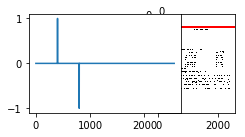

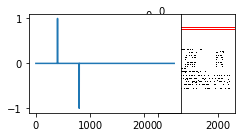

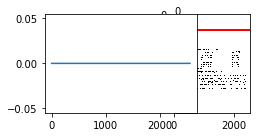

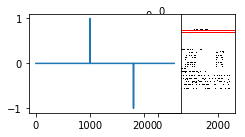

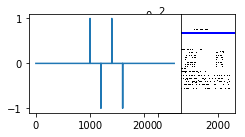

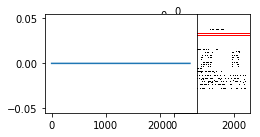

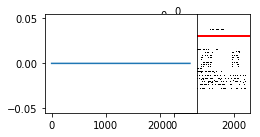

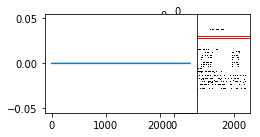

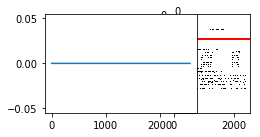

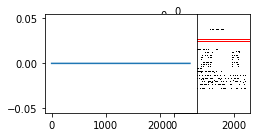

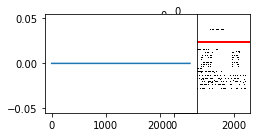

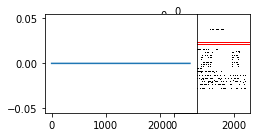

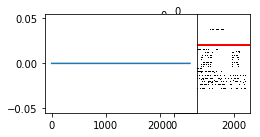

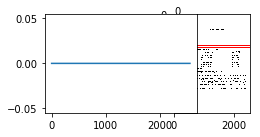

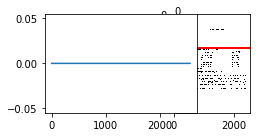

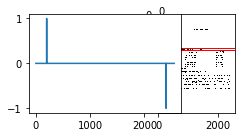

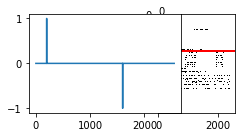

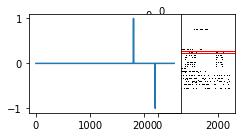

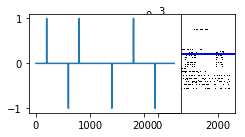

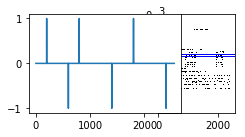

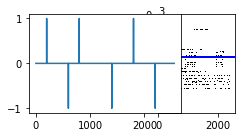

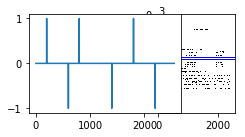

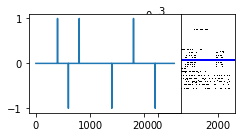

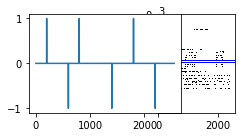

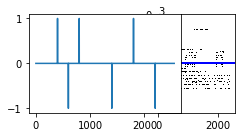

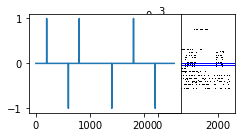

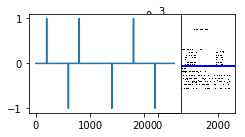

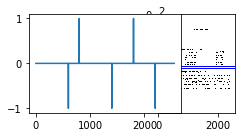

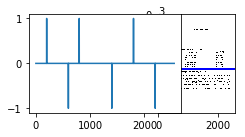

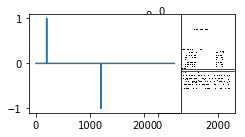

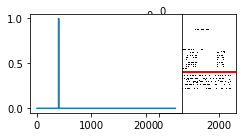

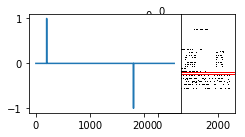

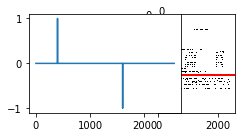

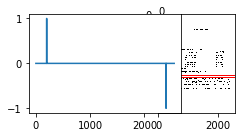

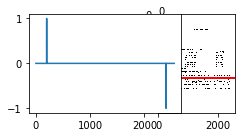

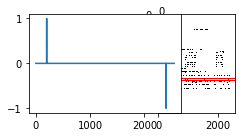

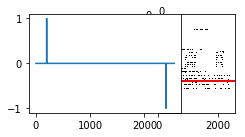

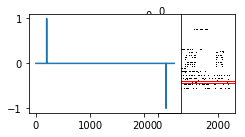

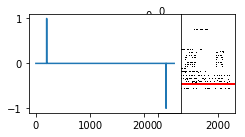

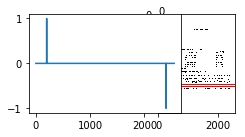

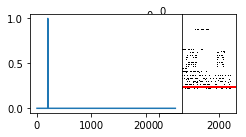

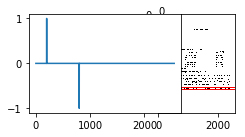

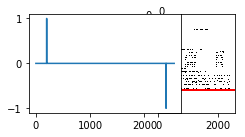

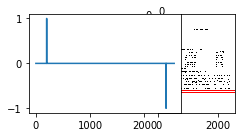

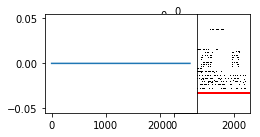

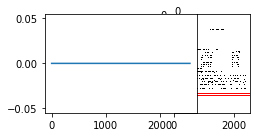

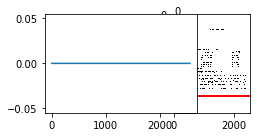

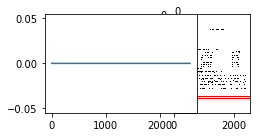

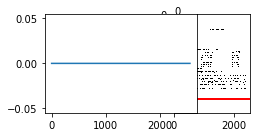

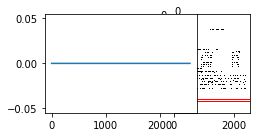

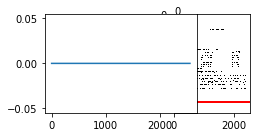

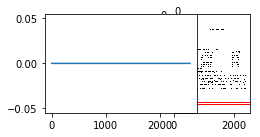

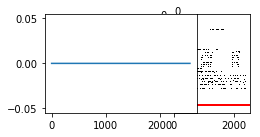

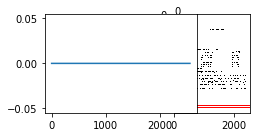

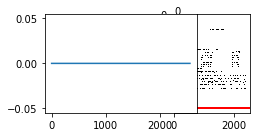

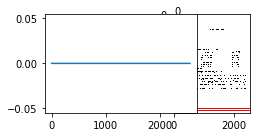

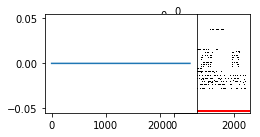

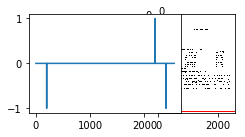

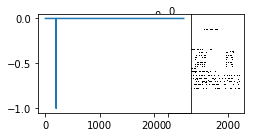

In [107]:
plt.imshow(img_orig,cmap='gray')
strip_height = 50
H, W = img.shape
n_strips = int(np.floor(H/strip_height))

for i in range(n_strips):
    start = i*strip_height
    end = start + strip_height
    # 1. Img strip
    img_strip = img[start:end, :]  
    # 2. Histo projection
    h_all = np.sum(img_strip, axis=0)
    # 3. Maxpool1D
    h_maxes = maxpool1D(h_all, w=200)
    # 4. Gradients
    g = np.gradient(h_maxes)
    # 5. Clean grads
    g_clean = clean_grads(g)

    row_confirmed, n_cols = row_pattern_detect(g_clean.copy())
    if row_confirmed:
        color = 'b'
    else:
        color = 'r'
    
    fig = plt.figure()    
    # Show the orig image with the strip on col 1
    ax = fig.add_subplot(211)
    rect = patches.Rectangle((0,end), W, strip_height,linewidth=1,edgecolor=color,facecolor='none')

    ax.add_patch(rect)
    ax.text(10,10,str(n_cols))
    ax.imshow(img_orig, cmap='gray')

    # Show next the cleaned up grad or histogram
    ax = fig.add_subplot(221)
    ax.plot(g_clean)
    

    
    
    


<Figure size 432x288 with 0 Axes>

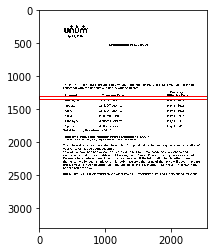

<Figure size 432x288 with 0 Axes>

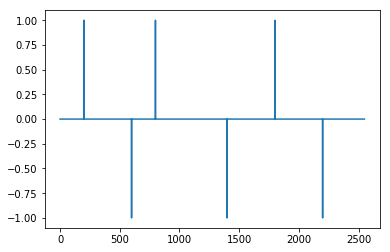

In [94]:

# Create figure and axes
fig = plt.figure()
fig,ax = plt.subplots(1)



strip_height = 50
start = 1250
end = start + strip_height
# Create a Rectangle patch
rect = patches.Rectangle((0,end),img_orig.shape[1],strip_height,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# Display the image
ax.imshow(img_orig, cmap='gray')
#ax.imshow()
#plt.show()
fig = plt.figure()
fig,ax = plt.subplots(1)
# 1. Img strip
img_strip = img[start:end, :]  
# 2. Histo projection
h_all = np.sum(img_strip, axis=0)
# 3. Maxpool1D
h_maxes = maxpool1D(h_all, w=200)
# 4. Gradients
g = np.gradient(h_maxes)
# 5. Clean grads
g_clean = clean_grads(g)
# Create figure and axes
#fig,ax = plt.subplots(2)

ax.plot(g_clean)

1250
1300


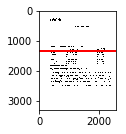

<Figure size 432x288 with 0 Axes>

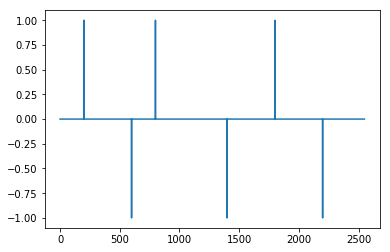

In [96]:
i = 25
start = i*strip_height
end = start + strip_height
print(start)
print(end)
# 1. Img strip
img_strip = img[start:end, :]  
# 2. Histo projection
h_all = np.sum(img_strip, axis=0)
# 3. Maxpool1D
h_maxes = maxpool1D(h_all, w=200)
# 4. Gradients
g = np.gradient(h_maxes)
# 5. Clean grads
g_clean = clean_grads(g)

row_confirmed = False
#row_confirmed = row_pattern_detect(g_clean)

if row_confirmed:
    color = 'b'
else:
    color = 'r'

fig = plt.figure()    
# Show the orig image with the strip on col 1
ax = fig.add_subplot(211)
rect = patches.Rectangle((0,end), W, strip_height,linewidth=1,edgecolor=color,facecolor='none')

ax.add_patch(rect)
ax.imshow(img_orig, cmap='gray')
fig = plt.figure()
fig,ax = plt.subplots(1)
# Show next the cleaned up grad or histogram
#ax = fig.add_subplot(221)
ax.plot(g_clean)

In [ ]:
i = 25
start = i*strip_height
end = start + strip_height
print(start)
print(end)
# 1. Img strip
img_strip = img[start:end, :]  
# 2. Histo projection
h_all = np.sum(img_strip, axis=0)
# 3. Maxpool1D
h_maxes = maxpool1D(h_all, w=200)
# 4. Gradients
g = np.gradient(h_maxes)
# 5. Clean grads
print(g.dtype)
g_clean = clean_grads(g)

row_confirmed = False
#row_confirmed = row_pattern_detect(g_clean)

if row_confirmed:
    color = 'b'
else:
    color = 'r'

fig = plt.figure()    
# Show the orig image with the strip on col 1
ax = fig.add_subplot(211)
rect = patches.Rectangle((0,end), W, strip_height,linewidth=1,edgecolor=color,facecolor='none')

ax.add_patch(rect)
ax.imshow(img_orig, cmap='gray')
fig = plt.figure()
fig,ax = plt.subplots(1)
# Show next the cleaned up grad or histogram
#ax = fig.add_subplot(221)
#ax.plot(g_clean)
g_clean = np.int64(g_clean)
ax.plot(g_clean ^ (shift(g_clean, 1, cval=0) & g_clean))
print(np.argwhere(g_clean == -1))
print(np.argwhere(g_clean ^ (shift(g_clean, 1, cval=0) & g_clean) == 1))